In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist

from sklearn import metrics

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

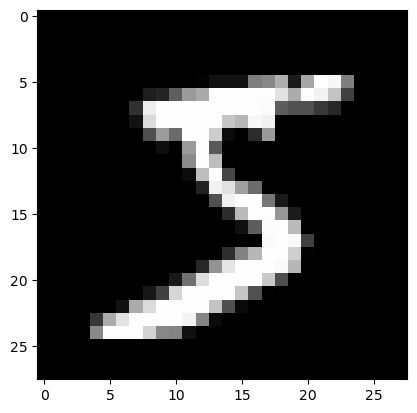

In [4]:
plt.imshow(x_train[0], cmap='gray')  # imshow() function which simply displays an image.
plt.show() 

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.
x_test = x_test.astype('float32')
x_train /= 255  # Each image has Intensity from 0 to 255
x_test /= 255

In [6]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]  # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test]

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))  # The input_shape argument is passed to the foremost layer. It comprises of a tuple shape,
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\jadha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='categorical_crossentropy',  # for a multi-class classification problem
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8588 - loss: 0.4454 - val_accuracy: 0.9567 - val_loss: 0.1364
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9672 - loss: 0.1097 - val_accuracy: 0.9731 - val_loss: 0.0844
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9767 - loss: 0.0741 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9814 - loss: 0.0574 - val_accuracy: 0.9747 - val_loss: 0.0801
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9853 - loss: 0.0467 - val_accuracy: 0.9797 - val_loss: 0.0638
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9881 - loss: 0.0360 - val_accuracy: 0.9821 - val_loss: 0.0621
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0351 - val_accuracy: 0.9823 - val_loss: 0.0650
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9908 - loss: 0.0283 - val_accuracy: 0.

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
     

Test loss: 0.08917929232120514
Test accuracy: 0.9835000038146973
